# Digital Image Processing

Project Overview: This project explores fundamental techniques in computer vision and data manipulation using Python. It demonstrates core competencies in using NumPy for matrix operations and Matplotlib for digital image rendering—skills essential for building Machine Learning pipelines

## Data Initialization


Importing NumPy and initalizing a 1D feature array for manipulation.

In [ ]:
# run this if you are missing any of the required libraries
!pip install matplotlib
!pip install numpy

Importing NumPy and initializing a 1D feature array for manipulation.

In [ ]:
import numpy as np

arr = np.array([1,2,3,4,5,6,7,8,9])

Generating a boolean mask to identify data points below a specific threshold (e.g., < 5).

In [ ]:
mask = arr < 5
print(mask)

[ True  True  True  True False False False False False]


Applying the boolean mask to extract and isolate specific subsets of data.

In [ ]:
print(arr[mask])

[1 2 3 4]


Directly querying the array to filter for specific patterns (e.g., even numbers) without intermediate variables.

In [ ]:
print(arr[arr % 2 == 0])

[2 4 6 8]


## Image Ingestion and Visualization


Loading raw image data into the environment and rendering the output using Matplotlib's pyplot interface.

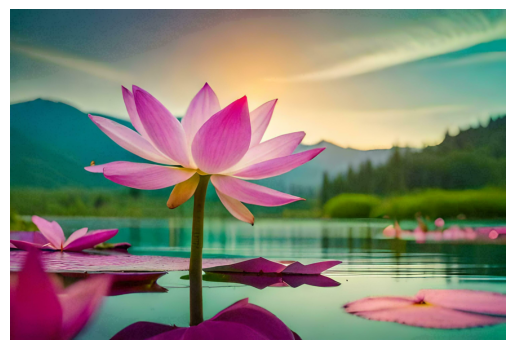

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.image import imread
img = Image.open ("flower.jpg")
plt.axis("off")
plt.imshow(img)


#print(type(image))
#image.size, image.shape

Image at different resolutions: low, medium, and high. Displayed in separate plots.

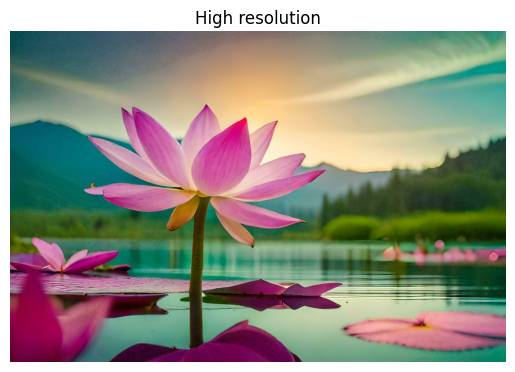

In [ ]:
high = img.resize((2400,1600), Image.LANCZOS)
plt.imshow(high)
plt.title("High resolution")
plt.axis("off")
plt.show()

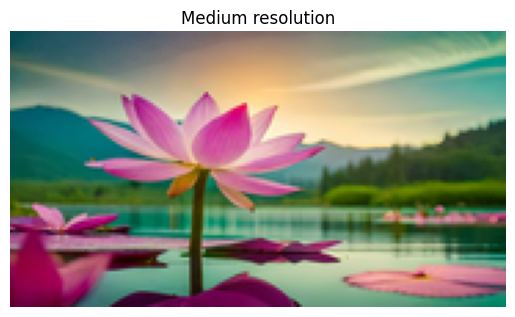

In [ ]:
medium = img.resize((180,100), Image.LANCZOS)
plt.imshow(medium)
plt.title("Medium resolution")
plt.axis("off")
plt.show()

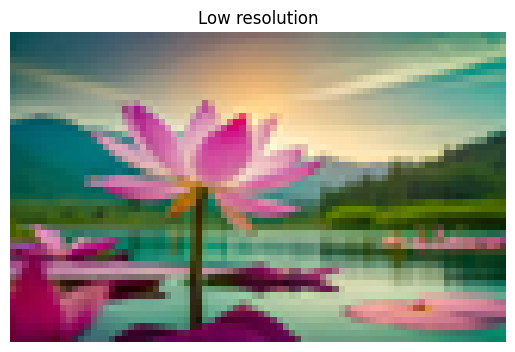

In [ ]:
low = img.resize((80,50), Image.LANCZOS)
plt.imshow(low)
plt.title("Low resolution")
plt.axis("off")
plt.show()

3 images in the same plot

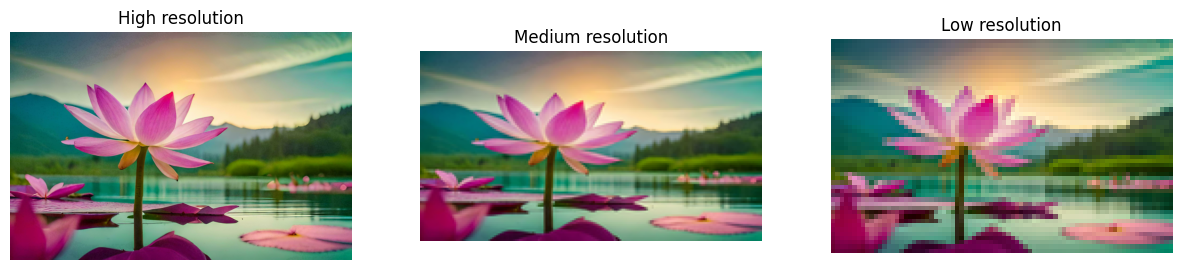

In [ ]:
fig,axes = plt.subplots(1,3, figsize = (15,6))
axes[0].imshow(high)
axes[0].set_title("High resolution")
axes[0].axis("off")

axes[1].imshow(medium)
axes[1].set_title("Medium resolution")
axes[1].axis("off")

axes[2].imshow(low)
axes[2].set_title("Low resolution")
axes[2].axis("off")

plt.show()




**Multi-Channel Component Analysis**

Objective: Decompose the RGB image into its constituent Red, Green, and Blue intensity channels.

Task: Visualize each channel as a grayscale heatmap to inspect the feature contribution of specific color spectra. Render the results in a 1x4 subplot layout, displaying the original composite image alongside the three isolated single-channel representations.

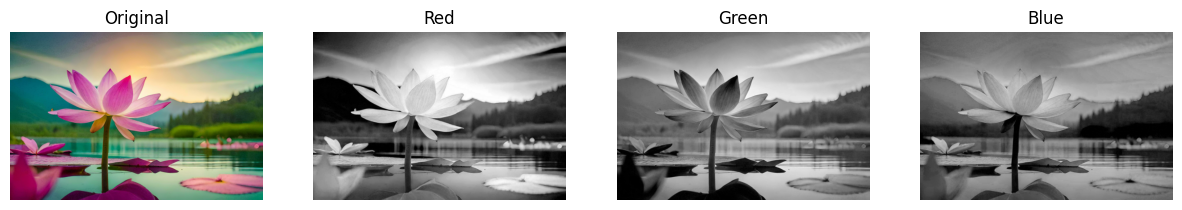

In [ ]:
img_np =np.array(img)
#print(img_np.shape)
#give me all the columns, and rows but only of RGB
red = img_np[:,:,0]
green = img_np[:,:,1]
blue = img_np[:,:,2]
#creating a 2D grayscale matrix

#plt.imshow(red, cmap="gray")
#1 row, 4 columns layout
fig,axes = plt.subplots(1,4, figsize = (15,6))

#original
axes[0].imshow(img_np)
axes[0].set_title("Original")
axes[0].axis("off")

#red
axes[1].imshow(red, cmap ="gray")
axes[1].set_title("Red")
axes[1].axis("off")

#green
axes[2].imshow(green, cmap ="gray")
axes[2].set_title("Green")
axes[2].axis("off")

#blue
axes[3].imshow(blue, cmap ="gray")
axes[3].set_title("Blue")
axes[3].axis("off")

plt.show()




**Algorithmic Histogram Implementation**

Objective: Analyze pixel intensity distributions by engineering a histogram calculation algorithm from scratch.

Task: Instead of relying on high-level library abstractions, implement a manual traversal algorithm (nested loops) to iterate through the image matrix. Tabulate the frequency of pixel intensity values (0-255) for the Red, Green, and Blue channels independently and visualize the resulting distributions.

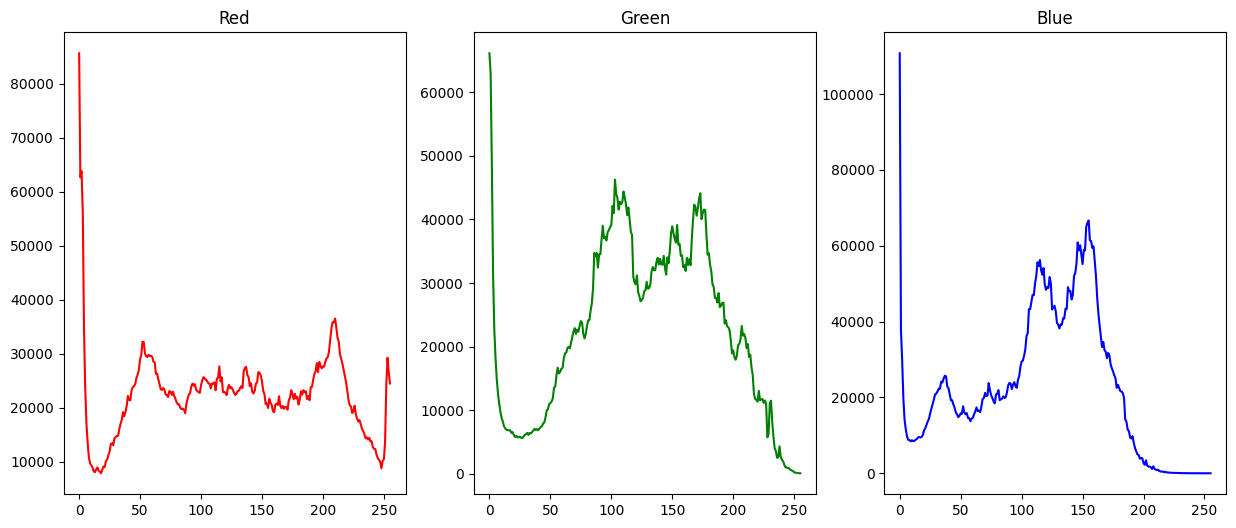

In [ ]:
image = Image.open("flower.jpg")
pixels = image.load()
width, height = image.size

hist_red = [0]*256
hist_green = [0]*256
hist_blue = [0]*256

for y in range(height):
  for x in range(width):
    r,g,b = pixels[x,y]

    hist_red[r]+=1
    hist_green[g]+=1
    hist_blue[b]+=1


fig,axes = plt.subplots(1,3, figsize = (15,6))

axes[0].plot(hist_red, color = "red")
axes[0].set_title("Red")

axes[1].plot(hist_green, color="green")
axes[1].set_title("Green")

axes[2].plot(hist_blue, color="blue")
axes[2].set_title("Blue")

plt.show()

**Discretized Histogram Analysis (Binning)**

Objective: Reduce data granularity by aggregating pixel intensities into discrete intervals (bins).

Task: Implement a binning logic (e.g., a bin width of 5) to group raw intensity values (0-4, 5-9, etc.). Compute and visualize the aggregated frequency distribution for each color channel to identify broader trends in image contrast and density.

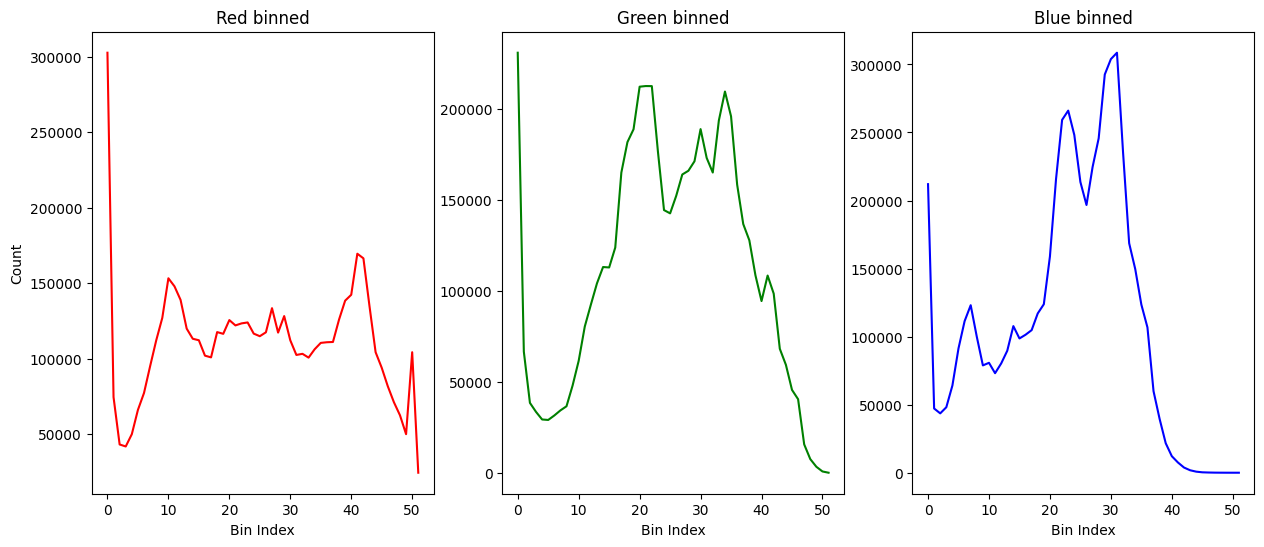

In [ ]:
image = Image.open("flower.jpg")
pixels = image.load()
width, height = image.size

#bin size = 5 btw range
bin_size=5
num_bins = (256 + bin_size-1)//bin_size

hist_red = [0]*num_bins
hist_green = [0]*num_bins
hist_blue = [0]*num_bins

#double loop again through pixels
for y in range(height):
  for x in range(width):
    r,g,b = pixels[x,y]

    #find the bin index
    bin_r = r//bin_size
    bin_g = g//bin_size
    bin_b = b//bin_size

    #count the pixels
    hist_red[bin_r]+=1
    hist_green[bin_g]+=1
    hist_blue[bin_b]+=1

fig,axes = plt.subplots(1,3, figsize = (15,6))

axes[0].plot(range(num_bins),hist_red, color = "red")
axes[0].set_xlabel("Bin Index")
axes[0].set_ylabel("Count")
axes[0].set_title("Red binned")

axes[1].plot(hist_green, color = "green")
axes[1].set_xlabel("Bin Index")
axes[1].set_title("Green binned")

axes[2].plot(hist_blue, color = "blue")
axes[2].set_xlabel("Bin Index")
axes[2].set_title("Blue binned")

plt.show()



Generate synthetic visual data by constructing a multi-dimensional array from scratch.

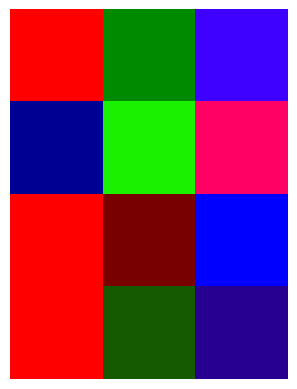

In [ ]:
from PIL import Image

width, height = 3,4
image = Image.new("RGB", (width,height))

pixels =image.load()

pixels[0,0] = (255,0,0)
pixels[1,0] = (0,138,0)
pixels[2,0] = (62,0,255)

pixels[0,1] = (0,0,146)
pixels[1,1] = (25,241,0)
pixels[2,1] = (255,0,100)

pixels[0,2] = (255,0,0)
pixels[1,2] = (120,0,0)
pixels[2,2] = (0,0,255)

pixels[0,3] = (255,0,0)
pixels[1,3] = (21,89,0)
pixels[2,3] = (40,0,145)



plt.imshow(image)
plt.axis("off")
plt.show()
